In [1]:
import numpy as np #For matrix operations
import matplotlib.pyplot as plt #For plotting
import mpmath as mp #For hypergeometric function
import scipy.special as ssp #For special functions like gamma, etc.
import qutip as qt #For Quantum Mechanical Calculations

In [2]:
#Defining value of useful parameters
mu = 5.17/2
hbar = 1
omega1 = 0.2021667
beta1 = np.sqrt((mu*omega1)/hbar)
d = (hbar**2)/(2*mu)

#Creating Grid
r_min = 1e-5/0.1972
r_max = 2/0.1972
N = 1001

X = np.linspace(r_min, r_max, N)
hd = X[1] - X[0]
Xr = X[1:N-1]

In [3]:
#Defining value of constant parameters in potential
C0 = 9.6293
kappa = 0.52
a = 2.34
v1 = 9.3434167
C1 = C0 - v1

Cornell Potentail

$$V_c(r) = C_0 - \frac{k}{r} + \frac{r}{a^2}$$

In [4]:
#Creating function for Cornell potential
def VC(x):
    return C0 - (kappa/x) + (x/(a**2))

Hamiltonian for cornell potential (with $\ell =0$):
$$H_{0} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dr^2} + V_c(r)$$

In [5]:
#Creating matrices for Hamiltonian
T0 = np.zeros([N-2, N-2])

for i in range(0, N-2):
    T0[i, i] = -2
    
for i in range(1, N-2):
    T0[i, i-1] = 1
    T0[i-1, i] = 1

    
V0 = np.zeros([N-2,N-2])

for i in range(0, N-2):
    V0[i, i] = VC(X[i+1])

In [6]:
#Creating Hamiltonian Matrix
H0 = -(d/(hd**2))*T0 + V0

In [7]:
Ham0 = qt.Qobj(H0) #Hamiltonian in Qutip
ES0 = Ham0.eigenstates() #Solving Hamiltonian Using Matrix Diagonalization

In [8]:
#Printing Energy Eigenvalues of first four S states
print(ES0[0][0: 4])

[ 9.45999529 10.05155864 10.39672205 10.67363567]


Toy SHO Model for Old Data:

Hamiltonian
    $$H_{1} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dr^2} + \frac{1}{2}\mu\omega_1^2 r^2 + v_1$$
where $\omega_1 = 0.2021667$ GeV and $v_1 = 9.3434167$ GeV

In [9]:
#Defining function for Toy SHO model
def VT(x):
    return v1+ 0.5*(mu)*(omega1**2)*(x**2)

In [10]:
# Creating matrices for Toy SHO model's Hamiltonian
T1 = np.zeros([N-2, N-2])

for i in range(0, N-2):
    T1[i, i] = -2
    
for i in range(1, N-2):
    T1[i, i-1] = 1
    T1[i-1, i] = 1

    
V1 = np.zeros([N-2,N-2])

for i in range(0, N-2):
    V1[i, i] = VT(X[i+1])

In [11]:
#Creating Hamiltonian Matrix for Toy SHO model
H1 = -(d/(hd**2))*T1 + V1

In [12]:
Ham1 = qt.Qobj(H1) #Hamiltonian in Qutip
ES1 = Ham1.eigenstates() #Solving the Hamiltonian

In [13]:
#printing Energy Eigenvalue of first four S states
print(ES1[0][0:4])

[ 9.64667341 10.0510042  10.45532851 10.85964687]


Perturbation to Hamiltonian:
$$V_{p} =  (C_0 - v_1) - \frac{k}{r} + \frac{r}{a^2} - \frac{1}{2}\mu\omega_1^2 r^2 $$

In [14]:
#Defining Perturbation potential function
def VP(x):
    return (C0 - v1) - (kappa/x) + (x/(a**2)) -  0.5*(mu)*(omega1**2)*(x**2)

In [15]:
#Creating Matrix for Perturbation term
HP = np.zeros([N-2,N-2])

for i in range(0, N-2):
    HP[i, i] = VP(X[i+1])

In [16]:
#Creating Complete Perturbed Hamiltonian
H2 = H1 + HP

In [17]:
Ham2 = qt.Qobj(H2) #Hamiltonian in Qutip
ES2 = Ham2.eigenstates() #Solving the Hamiltonian

In [18]:
#printing Energy Eigenvalue of first four S states
print(ES2[0][0:4])

[ 9.45999529 10.05155864 10.39672205 10.67363567]


In [19]:
#Defining Identity Matrices
Id = np.identity(N-2)

#Extracting Wavefunction of Unperturbed Hamiltonian
U00 = np.array(ES1[1][0])
U10 = np.array(ES1[1][1])
U20 = np.array(ES1[1][2])
U30 = np.array(ES1[1][3])

#Defining Projection Operators
P00 = np.outer(U00, U00)
P10 = np.outer(U10, U10)
P20 = np.outer(U20, U20)
P30 = np.outer(U30, U30)

#Defining Qn Operators
Q00 = Id - P00
Q10 = Id - P10
Q20 = Id - P20
Q30 = Id - P30

In [20]:
#Storing Energy Eigenvalues Calculated using Perturbation Theory (Different Jupyter Notebook) in variables.

E0 = 9.64667341 - 0.00485388210952648 - 0.11430079990424
E1 = 10.0510042 + 0.00620564335911367 - 0.0199358113832343
E2 = 10.45532851 - 0.0501805027405765 - 0.0152285509263789
E3 = 10.85964687 - 0.137259674224181 - 0.0324477573208918

print(E0, E1, E2, E3)

9.527518727986234 10.037274031975878 10.389919456333043 10.689939438454928


Define:

$$D(E) = (E\hat{I} - \hat{H}_1)^{-1}$$

In [21]:
#Defining D operator
D00 = np.linalg.inv(E0*Id - H1)
D10 = np.linalg.inv(E1*Id - H1)
D20 = np.linalg.inv(E2*Id - H1)
D30 = np.linalg.inv(E3*Id - H1)

Now, the $R$ matrix is simply
$$R(E) = D(E) Q_n \equiv Q_nD(E)$$
But I defined $R$ matrix equivalently as
$$R(E) = \frac{D(E) Q_n + Q_nD(E)}{2}$$

In [22]:
#Defining R operator
J00 = np.matmul(D00, Q00)
K00 = np.matmul(Q00, D00)
R00 = (J00 + K00)/2

J10 = np.matmul(D10, Q10)
K10 = np.matmul(Q10, D10)
R10 = (J10 + K10)/2

J20 = np.matmul(D20, Q20)
K20 = np.matmul(Q20, D20)
R20 = (J20 + K20)/2

J30 = np.matmul(D30, Q30)
K30 = np.matmul(Q30, D30)
R30 = (J30 + K30)/2

Now lets define
$$O(E) = R(E)H_p$$
and
$$T(E) = (1 - O(E))^{-1}$$

In [23]:
#Defining O operator
O00 = np.matmul(R00, HP)
O10 = np.matmul(R10, HP)
O20 = np.matmul(R20, HP)
O30 = np.matmul(R30, HP)

#Defining T operator
T00 = np.linalg.inv(Id - O00)
T10 = np.linalg.inv(Id - O10)
T20 = np.linalg.inv(Id - O20)
T30 = np.linalg.inv(Id - O30)

Finally, the perturbed wavefunction would be
$$\left|\psi_n\right> = T(E_n)\left|n\right>$$
where $\left|n\right>$ is the unperturbed wavefunction.

In [24]:
#Finally Calculating the Perturbed Wavefunction
W00 = np.matmul(T00, U00)
W10 = np.matmul(T10, U10)
W20 = np.matmul(T00, U20)
W30 = np.matmul(T10, U30)

In [25]:
#Extracting Actual Wavefunction of Perturbed Hamiltonian from H2 Hamiltonian
Y00 = np.array(ES2[1][0])
Y10 = np.array(ES2[1][1])
Y20 = np.array(ES2[1][2])
Y30 = np.array(ES2[1][3])

In [26]:
#Extracting Actual Wavefunction of Perturbed Hamiltonian from H0 Hamiltonian
Z00 = np.array(ES0[1][0])
Z10 = np.array(ES0[1][1])
Z20 = np.array(ES0[1][2])
Z30 = np.array(ES0[1][3])

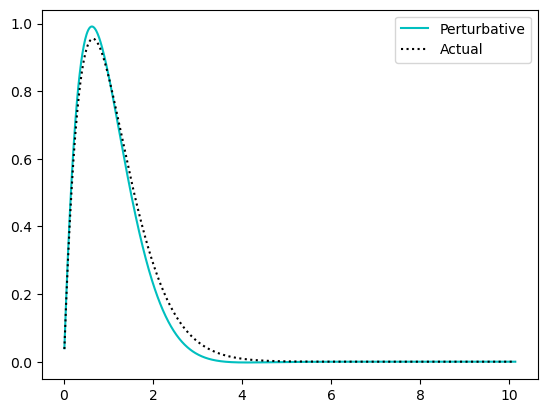

In [28]:
NW0 = np.sqrt(np.sum(W00**2)*hd)
NY0 = np.sqrt(np.sum(Y00**2)*hd)

plt.plot(Xr, W00/NW0, color='c')
plt.plot(Xr, Y00/NY0, ':', color='black')
plt.legend(['Perturbative', 'Actual'])
# plt.savefig("Plot02.pdf", format="pdf", bbox_inches="tight")
plt.show()

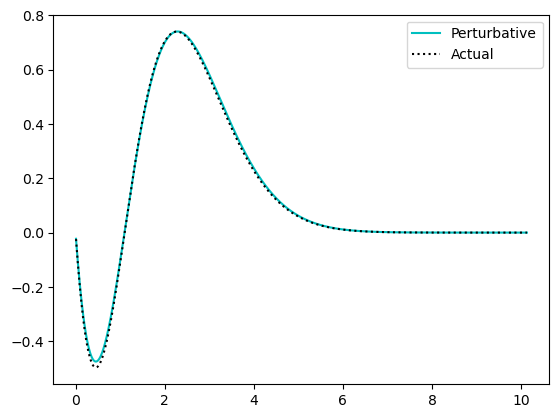

In [29]:
NW1 = np.sqrt(np.sum(W10**2)*hd)
NY1 = np.sqrt(np.sum(Y10**2)*hd)

plt.plot(Xr, W10/NW1, color='c')
plt.plot(Xr, Y10/NY1, ':', color='black')
plt.legend(['Perturbative', 'Actual'])
#plt.savefig("Plot01.pdf", format="pdf", bbox_inches="tight")
plt.show()

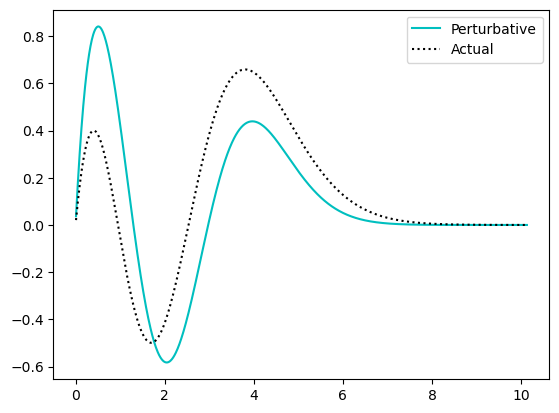

In [30]:
NW2 = np.sqrt(np.sum(W20**2)*hd)
NY2 = np.sqrt(np.sum(Y20**2)*hd)

plt.plot(Xr, W20/NW2, color='c')
plt.plot(Xr, Y20/NY2, ':', color='black')
plt.legend(['Perturbative', 'Actual'])
#plt.savefig("Plot01.pdf", format="pdf", bbox_inches="tight")
plt.show()

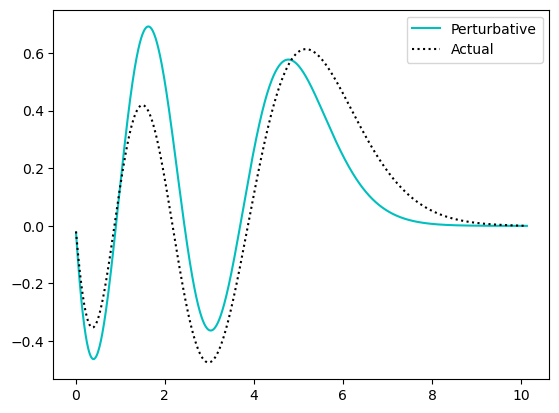

In [31]:
NW3 = np.sqrt(np.sum(W30**2)*hd)
NY3 = np.sqrt(np.sum(Y30**2)*hd)

plt.plot(Xr, W30/NW3, color='c')
plt.plot(Xr, Y30/NY3, ':', color='black')
plt.legend(['Perturbative', 'Actual'])
#plt.savefig("Plot01.pdf", format="pdf", bbox_inches="tight")
plt.show()